In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [4]:

data = pd.read_csv(r'E:\data set\Task-12\emails.csv')
data.head()

,Unnamed: 0,Category,Message,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


Data Preprocessing

In [6]:
label_encoder = LabelEncoder()
data['Category'] = label_encoder.fit_transform(data['Category'])

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Message'])
y = data['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Decision tree classifier

In [7]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

Model evaluation

In [8]:
y_pred = clf.predict(X_test)

In [9]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 0.89
Recall: 0.92
F1 Score: 0.91


Classification report

In [10]:
print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))

              precision    recall  f1-score   support

         ham       0.97      0.96      0.96       742
        spam       0.89      0.92      0.91       293

    accuracy                           0.95      1035
   macro avg       0.93      0.94      0.94      1035
weighted avg       0.95      0.95      0.95      1035



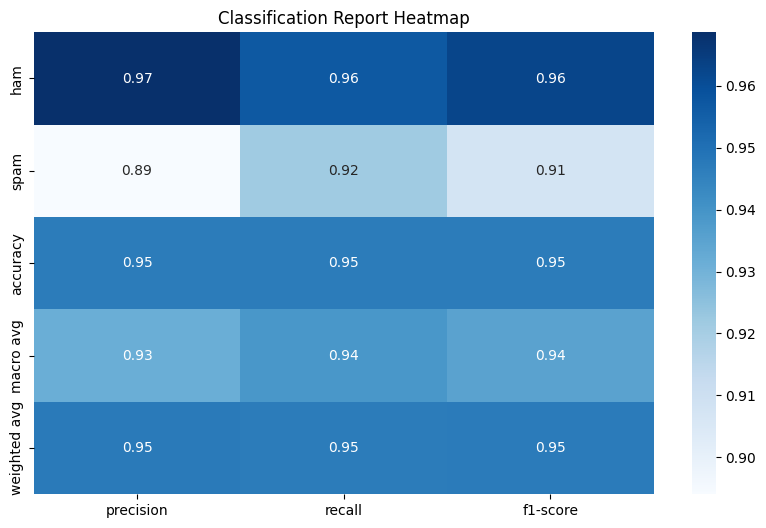

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=['ham', 'spam'], output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df[['precision', 'recall', 'f1-score']], annot=True, fmt='.2f', cmap='Blues')
plt.title('Classification Report Heatmap')
plt.show()
